In [1]:
from pycaret.datasets import get_data
import joblib as jb
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
df = pd.DataFrame(jb.load('01_EDA_Cleanup.bin'))

In [3]:
df = df.dropna()
df.shape

(56935, 83)

In [4]:
data, data_unseen = train_test_split(df, test_size=0.05, stratify=df['hospital_death'], random_state=42)

In [5]:
print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (54088, 83)
Unseen Data For Predictions: (2847, 83)


_______________________________

In [6]:
from pycaret.classification import *

In [7]:
exp_clf101 = setup(data = data, target = 'hospital_death',fix_imbalance = True)

,Description,Value
0,Session id,554
1,Target,hospital_death
2,Target type,Binary
3,Original data shape,"(54088, 83)"
4,Transformed data shape,"(85445, 120)"
5,Transformed train set shape,"(69218, 120)"
6,Transformed test set shape,"(16227, 120)"
7,Numeric features,61
8,Categorical features,7
9,Preprocess,True


In [21]:
var_optimizar = 'F1'
proba_thres = 0.3

In [9]:
best_model = compare_models(sort=var_optimizar)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
qda,Quadratic Discriminant Analysis,0.2339,0.7689,0.9554,0.0972,0.1765,0.0244,0.0940,0.5540
lr,Logistic Regression,0.7463,0.7976,0.6940,0.2079,0.3199,0.2163,0.2760,6.4850
nb,Naive Bayes,0.7407,0.0000,0.6685,0.1992,0.3070,0.2013,0.2574,0.6370
lda,Linear Discriminant Analysis,0.8227,0.8441,0.6547,0.2757,0.3880,0.3039,0.3429,0.6260
ridge,Ridge Classifier,0.8226,0.8439,0.6540,0.2755,0.3876,0.3035,0.3425,0.4160
svm,SVM - Linear Kernel,0.6607,0.6845,0.4985,0.2080,0.2208,0.1261,0.1562,2.6770
knn,K Neighbors Classifier,0.6738,0.0000,0.4176,0.1150,0.1803,0.0527,0.0699,0.8210
ada,Ada Boost Classifier,0.8989,0.8476,0.4170,0.4129,0.4145,0.3593,0.3594,2.4200
gbc,Gradient Boosting Classifier,0.9180,0.8672,0.3730,0.5314,0.4378,0.3951,0.4025,9.6950
dt,Decision Tree Classifier,0.8673,0.0000,0.3659,0.2863,0.3211,0.2488,0.2512,0.9910


In [10]:
print(best_model)

LinearDiscriminantAnalysis(covariance_estimator=None, n_components=None,
                           priors=None, shrinkage=None, solver='svd',
                           store_covariance=False, tol=0.0001)


In [ ]:
# et = create_model('et')
# et_tuned = tune_model(et, optimize=var_optimizar)
# print(f'Modelo Base Extra Trees:\n {et}')
# print(f'Modelo Entrenado Extra Trees:\n {et_tuned}')

In [ ]:
# rid = create_model('ridge')
# rid_tuned = tune_model(rid, optimize=var_optimizar)
# print(f'Modelo Base Ridge:\n {rid}')
# print(f'Modelo Entrenado Ridge:\n {rid_tuned}')

In [12]:
lgbm = create_model('lightgbm',probability_threshold=proba_thres)
lgbm_tuned = tune_model(lgbm, optimize=var_optimizar)
print(f'Modelo Base LGBM:\n {lgbm}')
print(f'Modelo Entrenado LGBM:\n {lgbm_tuned}')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9163,0.0000,0.5460,0.5130,0.5290,0.4831,0.4834
1,0.9015,0.0000,0.5169,0.4375,0.4739,0.4200,0.4218
2,0.9147,0.0000,0.5477,0.5028,0.5243,0.4775,0.4781
3,0.9123,0.0000,0.5415,0.4903,0.5146,0.4666,0.4672
4,0.9194,0.0000,0.5292,0.5309,0.5300,0.4860,0.4860
5,0.9004,0.0000,0.4677,0.4270,0.4464,0.3918,0.3923
6,0.9046,0.0000,0.4585,0.4461,0.4522,0.4000,0.4000
7,0.9060,0.0000,0.4708,0.4540,0.4622,0.4107,0.4108
8,0.9036,0.0000,0.4646,0.4415,0.4528,0.4000,0.4001


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9187,0.0000,0.5000,0.5292,0.5142,0.4699,0.4701
1,0.9147,0.0000,0.4985,0.5031,0.5008,0.4541,0.4541
2,0.9239,0.0000,0.5354,0.5595,0.5472,0.5057,0.5058
3,0.9142,0.0000,0.4800,0.5000,0.4898,0.4430,0.4431
4,0.9210,0.0000,0.4892,0.5445,0.5154,0.4725,0.4733
5,0.9099,0.0000,0.4431,0.4737,0.4579,0.4088,0.4091
6,0.9094,0.0000,0.4215,0.4692,0.4441,0.3949,0.3956
7,0.9142,0.0000,0.4492,0.5000,0.4733,0.4267,0.4274
8,0.9068,0.0000,0.4123,0.4527,0.4316,0.3809,0.3814


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Modelo Base LGBM:
 CustomProbabilityThresholdClassifier(boosting_type='gbdt', class_weight=None,
                                     classifier=LGBMClassifier(boosting_type='gbdt',
                                                               class_weight=None,
                                                               colsample_bytree=1.0,
                                                               importance_type='split',
                                                               learning_rate=0.1,
                                                               max_depth=-1,
                                                               min_child_samples=20,
                                                               min_child_weight=0.001,
                                                               min_split_gain=0.0,
                                                               n_estimators=100,
     

In [ ]:
# rf = create_model('rf')
# rf_tuned = tune_model(rf, optimize=var_optimizar)
# print(f'Modelo Base Random Forest:\n {rf}')
# print(f'Modelo Entrenado Random Forest:\n {rf_tuned}')

In [38]:
qda = create_model('qda')
qda_tuned = tune_model(qda, optimize='Recall')#var_optimizar)
print(f'Modelo Base QDA:\n {qda}')
print(f'Modelo Entrenado QDA:\n {qda_tuned}')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5191,0.8388,0.9202,0.1432,0.2478,0.1162,0.2266
1,0.5515,0.8188,0.9015,0.1496,0.2566,0.1282,0.2356
2,0.5557,0.8117,0.8677,0.1468,0.2511,0.1222,0.2208
3,0.5940,0.8390,0.9046,0.1633,0.2767,0.1536,0.2634
4,0.6231,0.8407,0.8923,0.1724,0.2890,0.1695,0.2763
5,0.5478,0.8242,0.9077,0.1492,0.2563,0.1277,0.2365
6,0.5967,0.8171,0.8708,0.1601,0.2704,0.1467,0.2480
7,0.6183,0.8138,0.8492,0.1651,0.2764,0.1549,0.2515
8,0.5679,0.7998,0.8769,0.1515,0.2584,0.1312,0.2330


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).
Modelo Base QDA:
 QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
                              store_covariance=False, tol=0.0001)
Modelo Entrenado QDA:
 QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
                              store_covariance=False, tol=0.0001)


In [ ]:
# nb = create_model('nb')
# nb_tuned = tune_model(nb, optimize=var_optimizar)
# print(f'Modelo Base Naive Bayes:\n {nb}')
# print(f'Modelo Entrenado Naive Bayes:\n {nb_tuned}')

In [12]:
lda = create_model('lda',probability_threshold=proba_thres)
lda_tuned = tune_model(lda, optimize=var_optimizar)
print(f'Modelo Base LDA:\n {lda}')
print(f'Modelo Entrenado LDA:\n {lda_tuned}')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9158,0.8597,0.3773,0.5146,0.4354,0.3910,0.3966
1,0.9184,0.8754,0.3631,0.5364,0.4330,0.3908,0.3995
2,0.9181,0.8728,0.3631,0.5339,0.4322,0.3898,0.3983
3,0.9213,0.8690,0.3723,0.5628,0.4481,0.4077,0.4178
4,0.9155,0.8562,0.3662,0.5107,0.4265,0.3822,0.3884
5,0.9120,0.8450,0.3323,0.4821,0.3934,0.3478,0.3548
6,0.9208,0.8615,0.3600,0.5598,0.4382,0.3977,0.4090
7,0.9216,0.8481,0.3877,0.5625,0.4590,0.4183,0.4267
8,0.9260,0.8673,0.4031,0.6037,0.4834,0.4453,0.4558


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9158,0.8595,0.3773,0.5146,0.4354,0.3910,0.3966
1,0.9184,0.8754,0.3631,0.5364,0.4330,0.3908,0.3995
2,0.9181,0.8726,0.3631,0.5339,0.4322,0.3898,0.3983
3,0.9213,0.8690,0.3754,0.5622,0.4502,0.4096,0.4193
4,0.9152,0.8561,0.3662,0.5085,0.4258,0.3813,0.3873
5,0.9118,0.8455,0.3323,0.4800,0.3927,0.3469,0.3537
6,0.9210,0.8617,0.3600,0.5625,0.4390,0.3987,0.4103
7,0.9210,0.8477,0.3877,0.5575,0.4574,0.4162,0.4242
8,0.9258,0.8674,0.4031,0.6009,0.4825,0.4442,0.4545


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).
Modelo Base LDA:
 LinearDiscriminantAnalysis(covariance_estimator=None, n_components=None,
                           priors=None, shrinkage=None, solver='svd',
                           store_covariance=False, tol=0.0001)
Modelo Entrenado LDA:
 LinearDiscriminantAnalysis(covariance_estimator=None, n_components=None,
                           priors=None, shrinkage=None, solver='svd',
                           store_covariance=False, tol=0.0001)


In [22]:
xgb = create_model('xgboost',probability_threshold=proba_thres)
xgb_tuned = tune_model(xgb, optimize=var_optimizar)
print(f'Modelo Base XGB:\n {xgb}')
print(f'Modelo Entrenado XGB:\n {xgb_tuned}')

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,02:25:34
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9139,0.0000,0.5153,0.5000,0.5076,0.4604,0.4605
1,0.9039,0.0000,0.4708,0.4435,0.4567,0.4040,0.4042
2,0.9184,0.0000,0.5108,0.5253,0.5179,0.4734,0.4734
3,0.9105,0.0000,0.5138,0.4799,0.4963,0.4472,0.4475
4,0.9179,0.0000,0.5046,0.5223,0.5133,0.4685,0.4685
5,0.9062,0.0000,0.4585,0.4543,0.4564,0.4050,0.4051
6,0.9025,0.0000,0.4185,0.4304,0.4243,0.3711,0.3712
7,0.9076,0.0000,0.4585,0.4613,0.4599,0.4093,0.4093
8,0.9023,0.0000,0.3938,0.4252,0.4089,0.3558,0.3561


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9100,0.0000,0.5460,0.4798,0.5108,0.4614,0.4626
1,0.9015,0.0000,0.5292,0.4388,0.4798,0.4259,0.4282
2,0.9083,0.0000,0.5538,0.4712,0.5092,0.4590,0.4608
3,0.9078,0.0000,0.5385,0.4679,0.5007,0.4502,0.4516
4,0.9078,0.0000,0.4862,0.4647,0.4752,0.4247,0.4248
5,0.9023,0.0000,0.4615,0.4348,0.4478,0.3942,0.3944
6,0.8988,0.0000,0.4677,0.4199,0.4425,0.3871,0.3877
7,0.8980,0.0000,0.4400,0.4121,0.4256,0.3697,0.3700
8,0.9020,0.0000,0.4892,0.4368,0.4615,0.4078,0.4086


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Modelo Base XGB:
 CustomProbabilityThresholdClassifier(base_score=None, booster='gbtree',
                                     callbacks=None,
                                     classifier=XGBClassifier(base_score=None,
                                                              booster='gbtree',
                                                              callbacks=None,
                                                              colsample_bylevel=None,
                                                              colsample_bynode=None,
                                                              colsample_bytree=None,
                                                              early_stopping_rounds=None,
                                                              enable_categorical=False,
                                                              eval_metric=None,
                                           

_________________

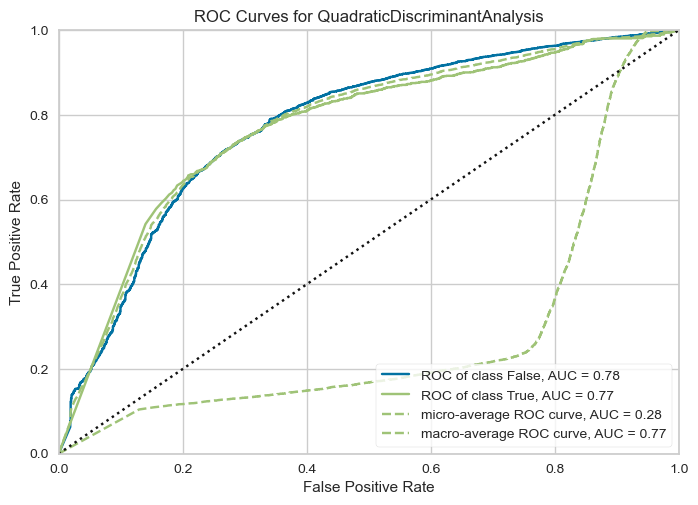

In [39]:
#plot_model(xgb_tuned, plot = 'auc')
#plot_model(lgbm_tuned, plot = 'auc')
plot_model(qda_tuned, plot = 'auc')

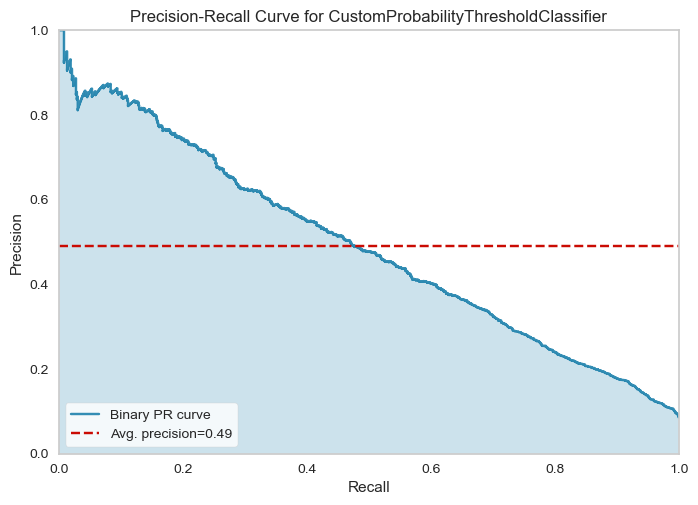

In [24]:
plot_model(xgb_tuned, plot = 'pr')

In [40]:
#interpret_model(xgb_tuned)
#interpret_model(lgbm_tuned)
interpret_model(qda_tuned)

TypeError: This function only supports tree based models for binary classification: xgboost, et, lightgbm, rf, dt.

In [41]:
#plot_model(xgb_tuned, plot='feature')
#plot_model(lgbm_tuned, plot='feature')
plot_model(qda_tuned, plot='feature')

TypeError: Feature Importance and RFE plots not available for estimators that doesnt support coef_ or feature_importances_ attribute.

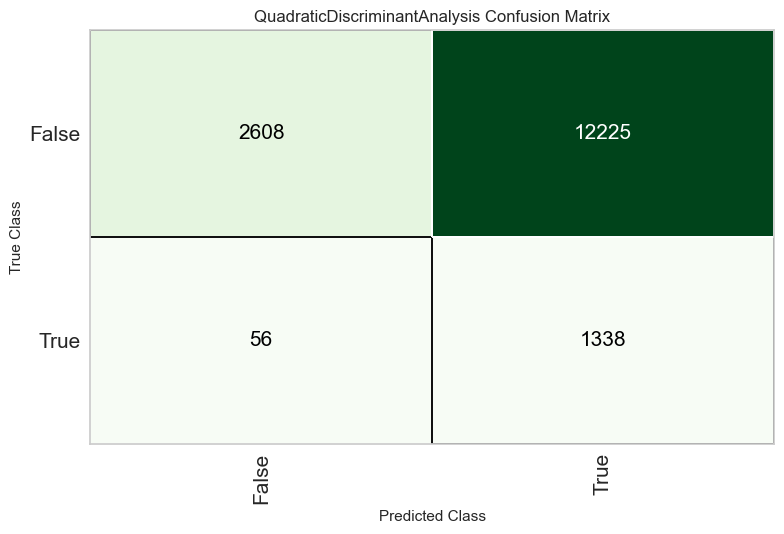

In [42]:
#plot_model(xgb_tuned, plot = 'confusion_matrix')
#plot_model(lgbm_tuned, plot = 'confusion_matrix')
plot_model(qda_tuned, plot = 'confusion_matrix')

In [30]:
evaluate_model(xgb_tuned)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

### Predict on test

In [31]:
predict_model(xgb_tuned)

,encounter_id,hospital_id,age,bmi,elective_surgery,ethnicity,gender,height,icu_admit_source,icu_id,...,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem,hospital_death,prediction_label,prediction_score
30005,88523,79,59,28.577961,False,Caucasian,F,162.0,Accident & Emergency,337,...,False,False,False,False,True,Sepsis,Cardiovascular,False,0,0.9999
11757,91847,78,40,34.131701,False,Caucasian,M,177.8,Accident & Emergency,187,...,False,False,False,False,False,Metabolic,Metabolic,False,0,0.9988
54535,107003,194,57,25.217359,False,African American,F,163.0,Accident & Emergency,601,...,False,False,False,False,False,Cardiovascular,Cardiovascular,False,0,0.9995
15894,67743,98,50,27.955085,False,Hispanic,F,165.1,Accident & Emergency,267,...,False,False,False,False,False,Metabolic,Metabolic,False,0,1.0000
38193,127360,54,52,60.388007,True,Caucasian,F,157.5,Operating Room / Recovery,479,...,False,False,False,False,False,Cardiovascular,Cardiovascular,False,0,0.9995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61689,113018,19,30,29.531111,False,Caucasian,M,180.3,Floor,664,...,False,False,False,False,False,Gastrointestinal,Gastrointestinal,False,0,0.9879
89165,98860,35,59,35.202477,False,African American,F,149.9,Floor,895,...,False,False,False,False,False,Cardiovascular,Cardiovascular,False,0,0.9965
39314,64774,62,34,21.486521,False,Caucasian,F,157.5,Accident & Emergency,477,...,False,False,False,False,False,Metabolic,Metabolic,False,0,1.0000
79738,37667,158,78,32.086863,True,Caucasian,M,172.7,Operating Room / Recovery,836,...,False,False,False,False,False,Cardiovascular,Cardiovascular,False,0,1.0000


### Finalize Model

In [32]:
final_dt = finalize_model(xgb_tuned)

In [33]:
print(final_dt)

Pipeline(memory=Memory(location=None),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['encounter_id', 'hospital_id',
                                             'age', 'bmi', 'height', 'icu_id',
                                             'pre_icu_los_days', 'weight',
                                             'apache_2_diagnosis',
                                             'apache_3j_diagnosis',
                                             'gcs_eyes_apache',
                                             'gcs_motor_apache',
                                             'gcs_verbal_apache',
                                             'heart_rate_apache', 'map_apache',
                                             'resprate_apache', 'temp...
                                                      gamma=None, gpu_id=None,
                                                      grow_policy=None,
         

In [34]:
predict_model(final_dt)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extreme Gradient Boosting,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


,encounter_id,hospital_id,age,bmi,elective_surgery,ethnicity,gender,height,icu_admit_source,icu_id,...,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem,hospital_death,prediction_label,prediction_score
30005,88523,79,59,28.577961,False,Caucasian,F,162.0,Accident & Emergency,337,...,False,False,False,False,True,Sepsis,Cardiovascular,False,0,0.9998
11757,91847,78,40,34.131701,False,Caucasian,M,177.8,Accident & Emergency,187,...,False,False,False,False,False,Metabolic,Metabolic,False,0,0.9993
54535,107003,194,57,25.217359,False,African American,F,163.0,Accident & Emergency,601,...,False,False,False,False,False,Cardiovascular,Cardiovascular,False,0,1.0000
15894,67743,98,50,27.955085,False,Hispanic,F,165.1,Accident & Emergency,267,...,False,False,False,False,False,Metabolic,Metabolic,False,0,0.9999
38193,127360,54,52,60.388007,True,Caucasian,F,157.5,Operating Room / Recovery,479,...,False,False,False,False,False,Cardiovascular,Cardiovascular,False,0,0.9984
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61689,113018,19,30,29.531111,False,Caucasian,M,180.3,Floor,664,...,False,False,False,False,False,Gastrointestinal,Gastrointestinal,False,0,0.9967
89165,98860,35,59,35.202477,False,African American,F,149.9,Floor,895,...,False,False,False,False,False,Cardiovascular,Cardiovascular,False,0,0.9998
39314,64774,62,34,21.486521,False,Caucasian,F,157.5,Accident & Emergency,477,...,False,False,False,False,False,Metabolic,Metabolic,False,0,0.9999
79738,37667,158,78,32.086863,True,Caucasian,M,172.7,Operating Room / Recovery,836,...,False,False,False,False,False,Cardiovascular,Cardiovascular,False,0,1.0000


In [35]:
unseen_predictions = predict_model(final_dt, data=data_unseen)
unseen_predictions.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extreme Gradient Boosting,0.9041,0.8616,0.5020,0.4489,0.4740,0.4214,0.4222


,encounter_id,hospital_id,age,bmi,elective_surgery,ethnicity,gender,height,icu_admit_source,icu_id,...,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem,hospital_death,prediction_label,prediction_score
40102,30740,54,59,22.264933,True,African American,M,190.5,Operating Room / Recovery,474,...,False,False,False,False,False,Respiratory,Respiratory,True,0,0.9998
79830,14125,196,36,34.186179,False,Caucasian,F,152.4,Floor,829,...,False,False,False,False,False,Cardiovascular,Cardiovascular,False,1,0.3981
11075,125979,174,82,27.516419,False,African American,F,162.6,Accident & Emergency,212,...,False,False,False,False,False,Sepsis,Cardiovascular,False,1,0.9872
32646,2853,10,77,17.19067,False,Caucasian,F,162.6,Accident & Emergency,428,...,False,False,False,False,False,Neurological,Neurologic,False,0,0.9998
18152,25809,76,61,32.066658,False,Hispanic,M,178.0,Floor,256,...,False,False,False,False,False,Gastrointestinal,Gastrointestinal,True,0,0.9504


In [36]:
from pycaret.utils.generic import check_metric
res_acc = check_metric(unseen_predictions['hospital_death'], unseen_predictions['prediction_label'], metric = 'Accuracy')
res_prec = check_metric(unseen_predictions['hospital_death'], unseen_predictions['prediction_label'], metric = 'Precision')
res_rec = check_metric(unseen_predictions['hospital_death'], unseen_predictions['prediction_label'], metric = 'Recall')
res_f1 = check_metric(unseen_predictions['hospital_death'], unseen_predictions['prediction_label'], metric = 'F1')

print(f'El resultado final es: \n Accuracy: {res_acc}\n Precision: {res_prec}\n Recall: {res_rec}\n F1: {res_f1}\n')

El resultado final es: 
 Accuracy: 0.9041
 Precision: 0.4489
 Recall: 0.502
 F1: 0.474



In [ ]:
save_model(final_dt,'./FinalModel')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['encounter_id', 'hospital_id',
                                              'age', 'bmi', 'height', 'icu_id',
                                              'pre_icu_los_days', 'weight',
                                              'apache_2_diagnosis',
                                              'apache_3j_diagnosis',
                                              'gcs_eyes_apache',
                                              'gcs_motor_apache',
                                              'gcs_verbal_apache',
                                              'heart_rate_apache', 'map_apache',
                                              'resprate_apache', 'temp...
                  LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                 colsample_bytree=1.0, importance_type='s